<h1><center>Assignment 7

# Name: Sharimbaev Batir

# ID: 190103206

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import numpy as np

In [2]:
# I read excel file with pandas
df = pd.read_excel('sdu_registration.xlsx')
df.head()

,№,YEAR,TERM,EDU_LEVEL,CIPHER,PROG_CODE,SPECIALITY,EDU_LANG,CLASS,TYPE,STUD_ID,DERS_KOD,COURSE_TITLE,CREDITS,ECTS,SECTION,TEACHER
0,1,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1812,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
1,2,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1348,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
2,3,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1331,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
3,4,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1817,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova
4,5,2019,1,B,6B061001,10113,Information Systems,EN,1,N,stud1813,MDE 135,Turkish Language 1 (B1 level),2,3,15,PhD Zhanagul Turumbetova


__1. Find number of students in each course and group courses into 5 categories by their number of students. Plot a histogram with number of courses in each category.__

In [3]:
# I Found number of students in each course
courses = df['COURSE_TITLE'].value_counts().index.tolist()
students = df['COURSE_TITLE'].value_counts().tolist()

In [4]:
# I read it with pandas and we have 119 courses
df2 = pd.DataFrame({'Courses': courses, 'Students': students})
df2

,Courses,Students
0,Physical Education 3,646
1,Mathematics for Computer Science 1,588
2,Probability and Mathematical Statictics,588
3,Linear Algebra,586
4,Fundamentals of Programming,571
...,...,...
114,Internship,2
115,Formalization and Defense of Master’s Project,2
116,Complex examination,2
117,Experimental Research Work of Master Student 3,2


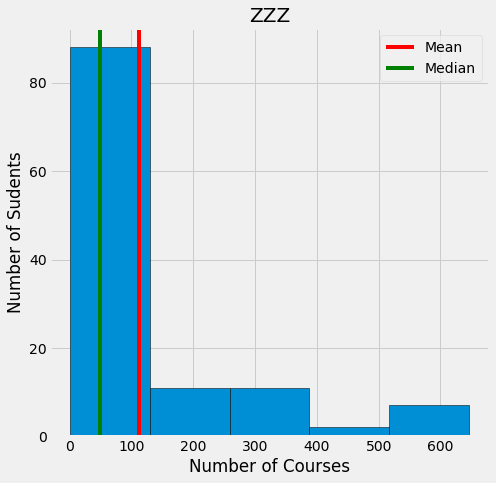

In [9]:
# I chose style 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# This is size of figure
plt.figure(figsize=(7, 7))

# I divided the course numbers into 5 categories
plt.hist(students, bins=5, edgecolor='black')

# I found mean and median of students
mean_soc = st.mean(students)
median_soc = st.median(students)

# And I plot them
plt.axvline(mean_soc, color='red', label='Mean')
plt.axvline(median_soc, color='green', label='Median')

# These are small definitions
plt.title('ZZZ')
plt.xlabel('Number of Courses')
plt.ylabel('Number of Sudents')
plt.legend()
plt.show()

__2. Display bar plot of all instructors and their student counts sorted by counts.__

In [6]:
# I Found number of students in each instructor
instructors = df['TEACHER'].value_counts().index.tolist()
instructors_students = df['TEACHER'].value_counts().tolist()

In [7]:
# I read it with pandas and we have 104 instructors
df2 = pd.DataFrame({'Instructors': instructors, 'Instructors_students': instructors_students})
df2.sort_values('Instructors_students', inplace=True)
df2

,Instructors,Instructors_students
103,PhD Kurmangazy Sadykbekov,3
102,Aidarkhan Kaimov,5
100,Zhumaniyaz Mamatnabiyev,7
101,Ulykbek Shambulov,7
99,PhD Cemal Ozdemir,8
...,...,...
4,Zhanbolat Khanafiya,315
3,PhD Shynar Auyelbekova,333
2,Satbek Abdyldayev,382
1,Yerbol Bugybayev,402


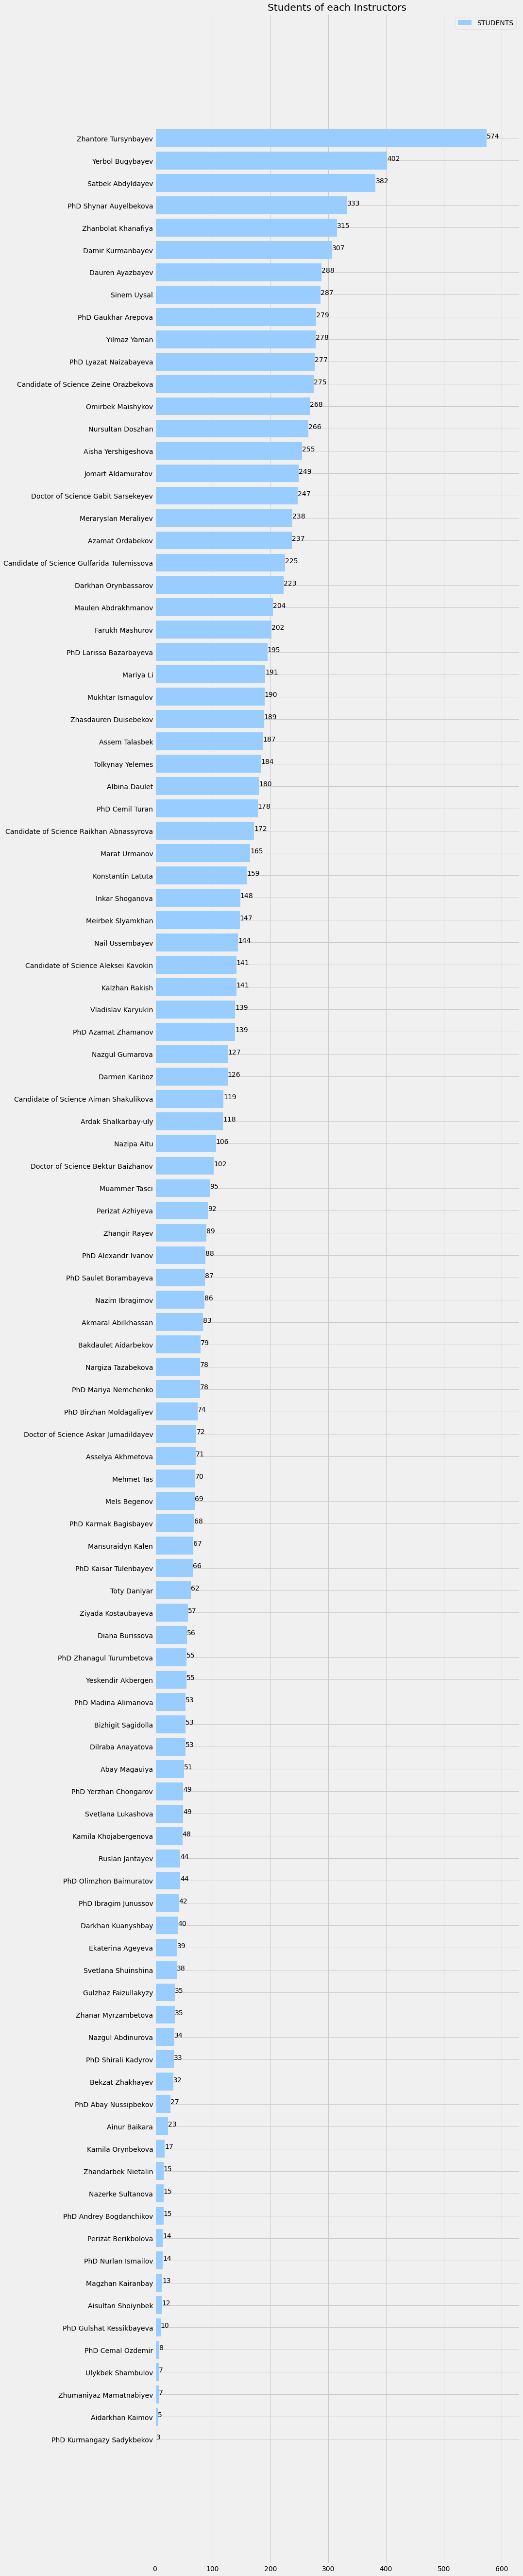

In [8]:
# This  is size of figure
plt.figure(figsize=(12,90))

# I made a horizantal bar or barh and its color, label, etc
ax1 = plt.subplot()
ax1.barh(df2['Instructors'], df2['Instructors_students'], color='#99CCFF', label="STUDENTS")


# I wrote the number of students next next from diagram
for y, x in enumerate(df2['Instructors_students']):
    ax1.annotate(x, xy=(x,y))

# For the numbers, I created the appropriate width
ax1.set_xlim(0, df2['Instructors_students'].max()*1.1)

# This is title, legend for label
plt.title('Students of each Instructors')
plt.legend()
plt.show()

__3. Show a scatter plot of CIPHER and TEACHER with size of circle by student count.__

In [125]:
# I Found number of students in each CIPHER
ciphers_students = df['CIPHER'].value_counts().tolist()
ciphers = df['CIPHER'].value_counts().index.tolist()

In [126]:
# I read it with pandas and we have 8 ciphers
df3 = pd.DataFrame({'Ciphers': ciphers, 'Ciphers_students': ciphers_students})
df3.sort_values('Ciphers_students', inplace=True)
df3

,Ciphers,Ciphers_students
7,7M061004,8
6,8D061002,64
5,7M054001,78
4,6B061003,202
3,7M061002,367
2,6B054001,981
1,6B061002,5016
0,6B061001,6625


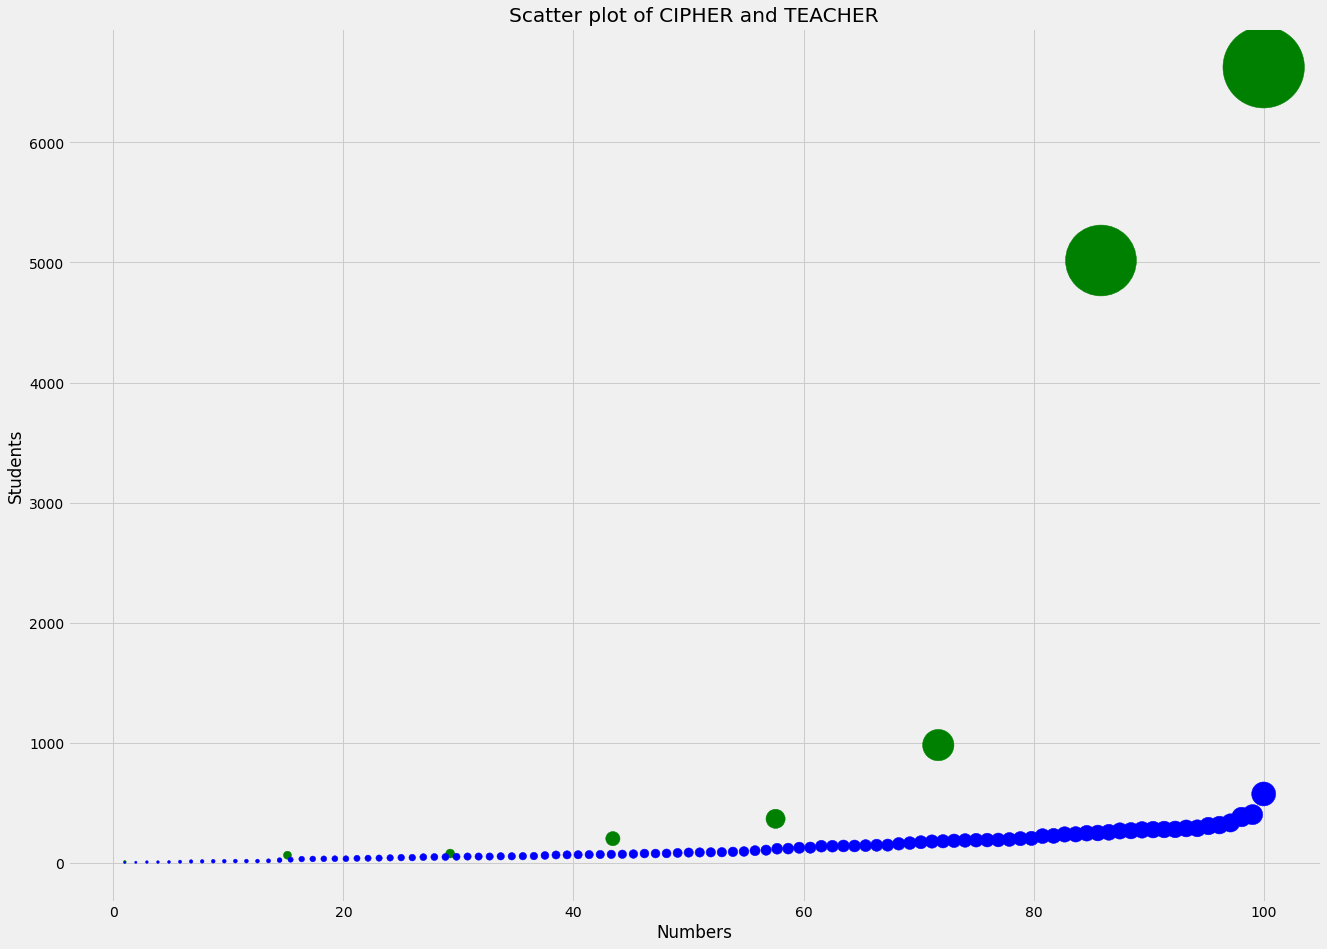

In [124]:
# This  is size of figure
plt.figure(figsize=(20, 15))

#This is style of graph
plt.style.use('fivethirtyeight')

# There are linspace of ciphers and instructors
x1 = np.linspace(1, 100, 8)
x2 = np.linspace(1, 100, 104)

# I plotted CIPHER and TEACHER and sizes of circle are number of students 
plt.scatter(x1, df3['Ciphers_students'], s=df3['Ciphers_students'], color='green')
plt.scatter(x2, df2['Instructors_students'], s=df2['Instructors_students'], color='blue')

# Titles of graph
plt.title('Scatter plot of CIPHER and TEACHER')
plt.xlabel('Numbers')
plt.ylabel('Students')
plt.show()

__4. Display horizontal bar plot with number of instructors who give at least one lesson on each educational level__

In [133]:
# I put edu_level and teacher on another dataframe and I deleted duplicate values and left only one
df4 = df[['EDU_LEVEL', 'TEACHER']]
df4 = df4.drop_duplicates(keep="first")
df4

,EDU_LEVEL,TEACHER
0,B,PhD Zhanagul Turumbetova
9,B,Yerbol Bugybayev
61,M,Nazim Ibragimov
72,DR,Nazim Ibragimov
74,B,PhD Madina Alimanova
...,...,...
12636,B,Darkhan Kuanyshbay
12741,M,Aisultan Shoiynbek
12747,DR,Aisultan Shoiynbek
12887,B,PhD Nurlan Ismailov


In [134]:
# I found teachers who teach at all 3 levels and there are 2 teacher
best_teachers = df4['TEACHER'].value_counts()[df4['TEACHER'].value_counts() == 3].index.tolist()
best_teachers

['Nazim Ibragimov', 'PhD Abay Nussipbekov']

In [135]:
# I found the number of their students
best_teachers_students_indexes = [df2['Instructors'][df2['Instructors'] == i].index[0] for i in best_teachers]
best_teachers_students = [df2['Instructors_students'][i] for i in best_teachers_students_indexes]
best_teachers_students

[86, 27]

In [136]:
# I read it with pandas and we have 2 best teachers and why aren't you there?)
df5 = pd.DataFrame({'Best teachers': best_teachers, 'Best teachers students': best_teachers_students})
df5.sort_values('Best teachers students', inplace=True)
df5

,Best teachers,Best teachers students
1,PhD Abay Nussipbekov,27
0,Nazim Ibragimov,86


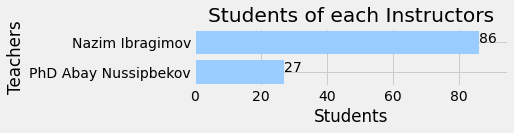

In [138]:
# This  is size of figure
plt.figure(figsize=(5, 1))

# I made a horizantal bar or barh and its color, label, etc
ax2 = plt.subplot()
ax2.barh(df5['Best teachers'], df5['Best teachers students'], color='#99CCFF')

# I wrote the number of students next next from diagram
for y, x in enumerate(df5['Best teachers students']):
    ax2.annotate(x, xy=(x,y))

# For the numbers, I created the appropriate width
ax2.set_xlim(0, df5['Best teachers students'].max()*1.1)

# This is title, legend for label
plt.title('Students of each Instructors')
plt.xlabel('Students')
plt.ylabel('Teachers')
plt.show()